In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('mobile_price_classification.csv')
#test=pd.read_csv('test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Checking for Null Values

In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# Converting RAM values from MB To GB

In [8]:
df['ram']=round(df['ram']/1024,1)

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2.5,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2.6,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2.5,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2.7,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1.4,8,2,15,1,1,0,1


In [10]:
for feature in df.columns:
    print("{} features has {} no of unique_values".format(feature,df[feature].nunique()))

battery_power features has 1094 no of unique_values
blue features has 2 no of unique_values
clock_speed features has 26 no of unique_values
dual_sim features has 2 no of unique_values
fc features has 20 no of unique_values
four_g features has 2 no of unique_values
int_memory features has 63 no of unique_values
m_dep features has 10 no of unique_values
mobile_wt features has 121 no of unique_values
n_cores features has 8 no of unique_values
pc features has 21 no of unique_values
px_height features has 1137 no of unique_values
px_width features has 1109 no of unique_values
ram features has 38 no of unique_values
sc_h features has 15 no of unique_values
sc_w features has 19 no of unique_values
talk_time features has 19 no of unique_values
three_g features has 2 no of unique_values
touch_screen features has 2 no of unique_values
wifi features has 2 no of unique_values
price_range features has 4 no of unique_values


#### From Numeric features to continous and descrete features

In [11]:
des_fea=[feature for feature in df.columns[:-1] if df[feature].nunique()<=26]
con_fea=[feature for feature in df.columns[:-1] if feature not in des_fea]

In [12]:
des_fea

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [13]:
len(des_fea)

14

In [14]:
con_fea
#print(len(con_fea))

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

#### Univariate Analysis of descrete features

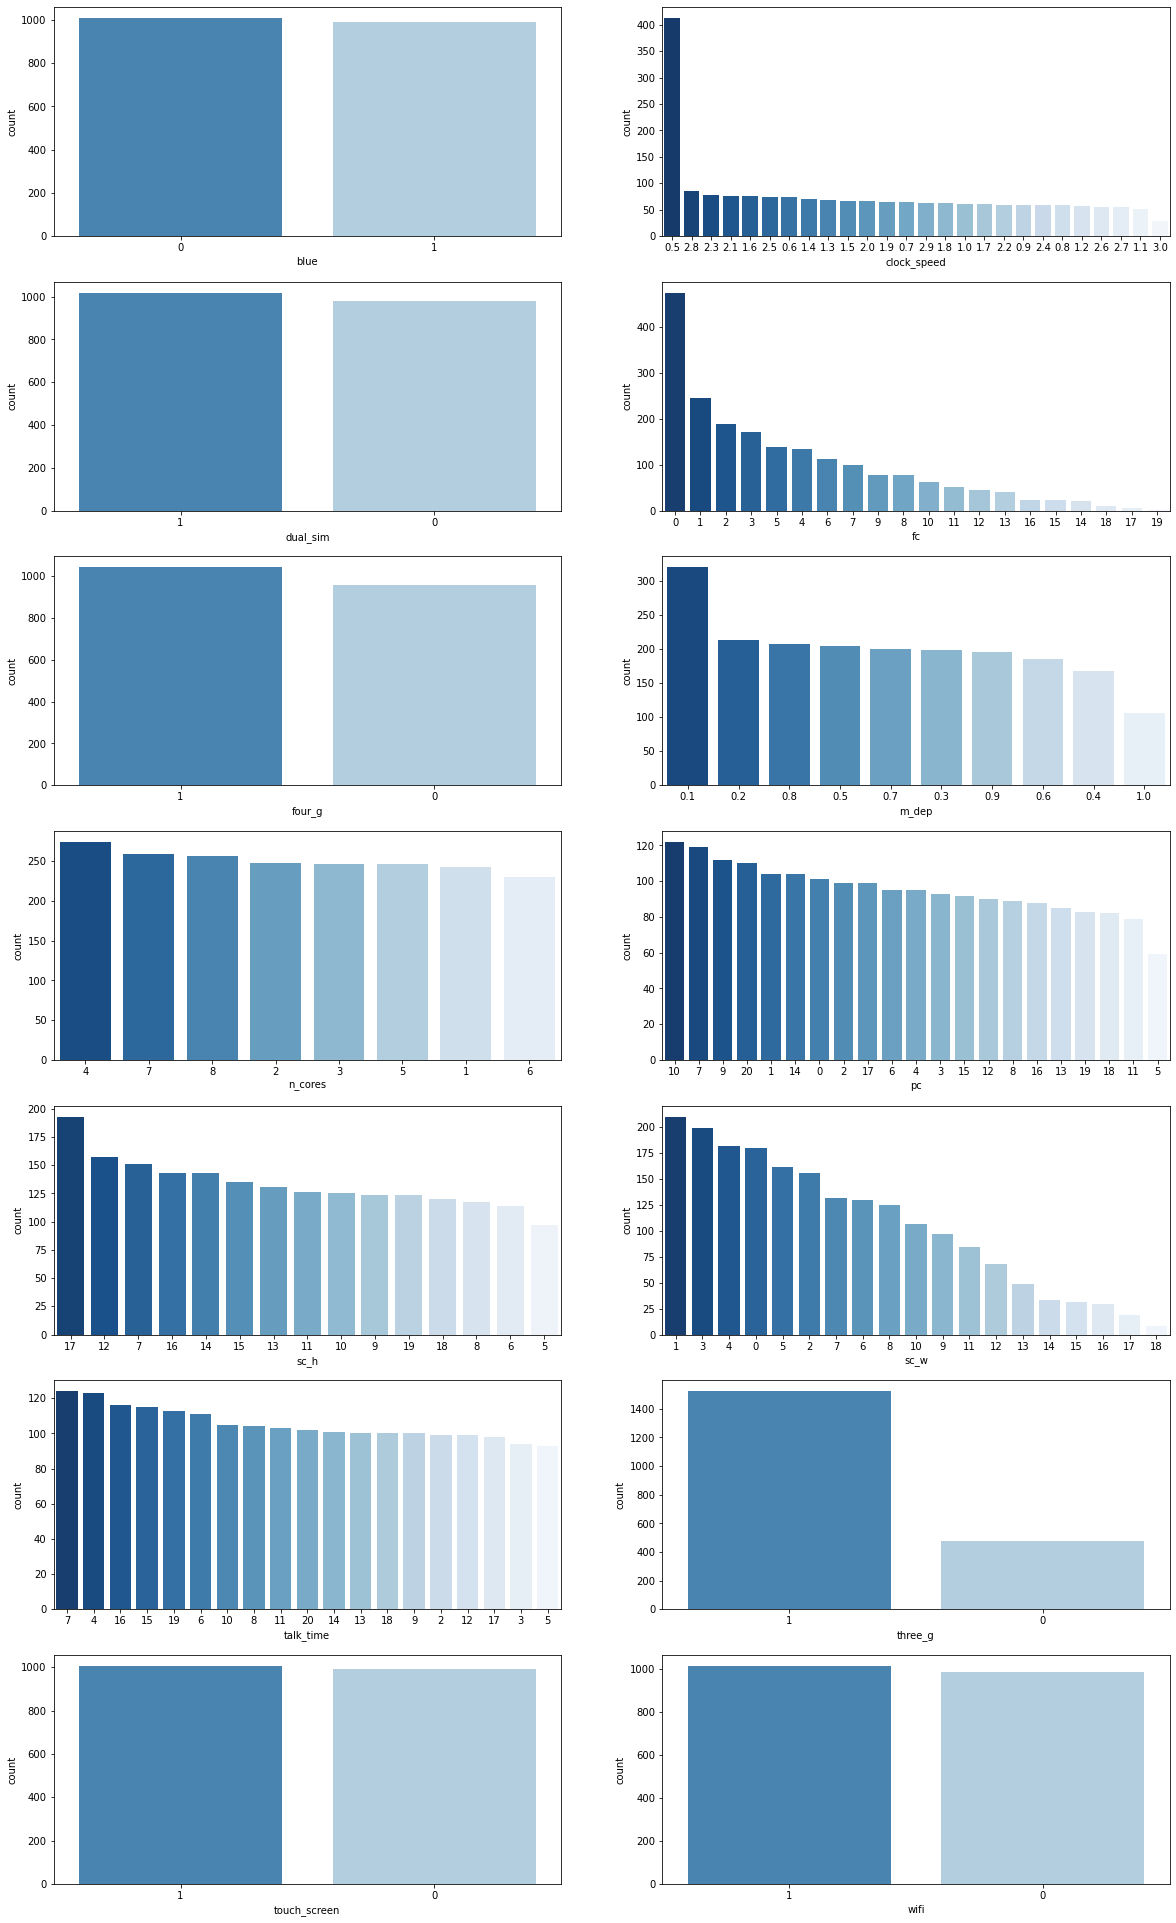

In [15]:
c=1
plt.figure(figsize=(20,80))
for feature in des_fea:
    plt.subplot(16,2,c)
    #Here order  parameter can be used to sort on basis of counts and  and palette can be used for color degredation as count decreases
    sns.countplot(data=df,x=feature,order=df[feature].value_counts().index,palette=sns.color_palette("Blues_r",len(df[feature].unique())))
    c+=1

#### Comparison of Price range and Descrete features

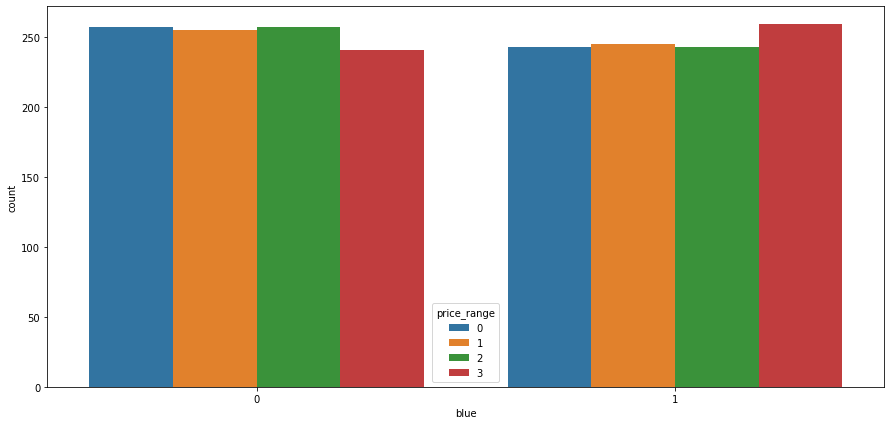

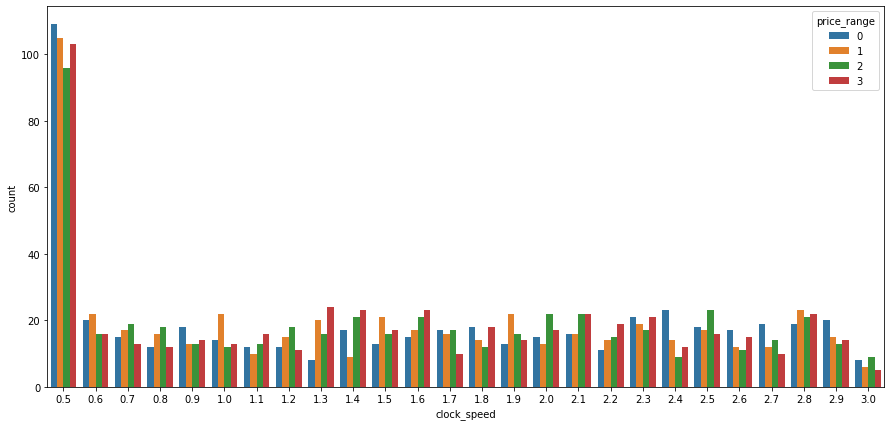

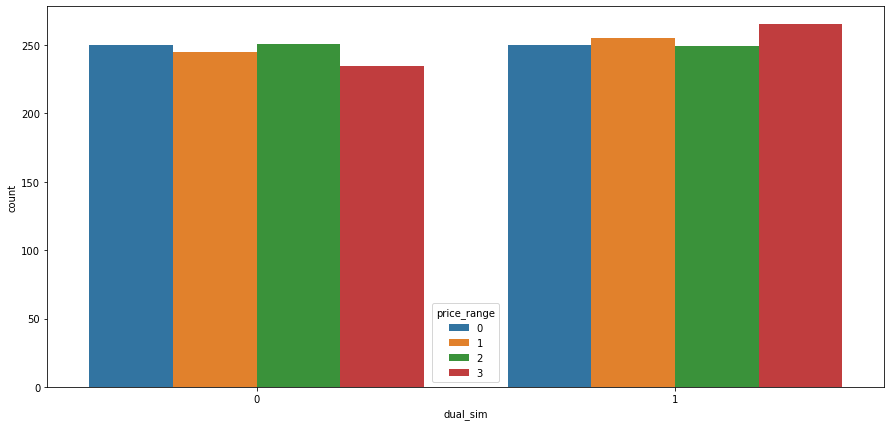

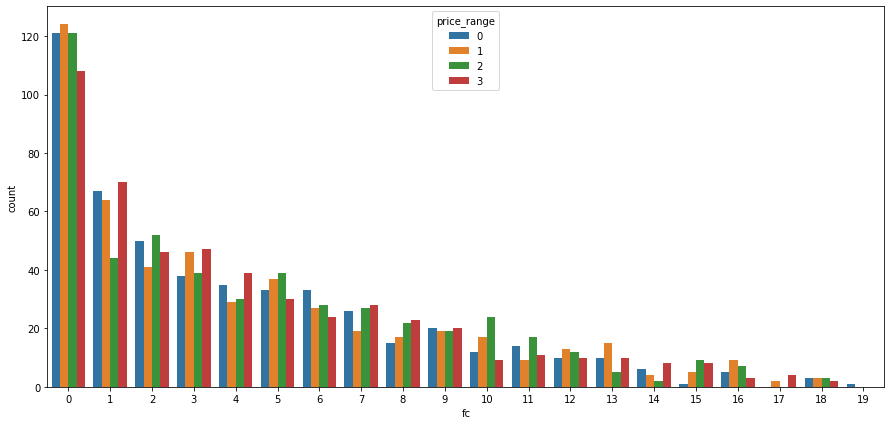

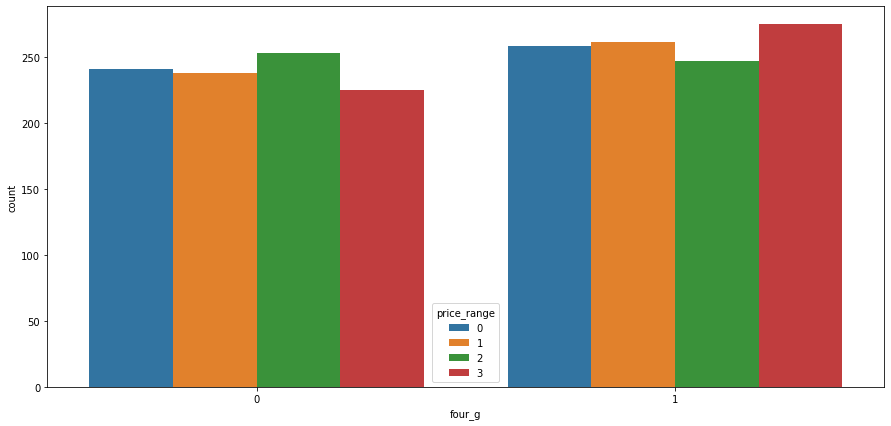

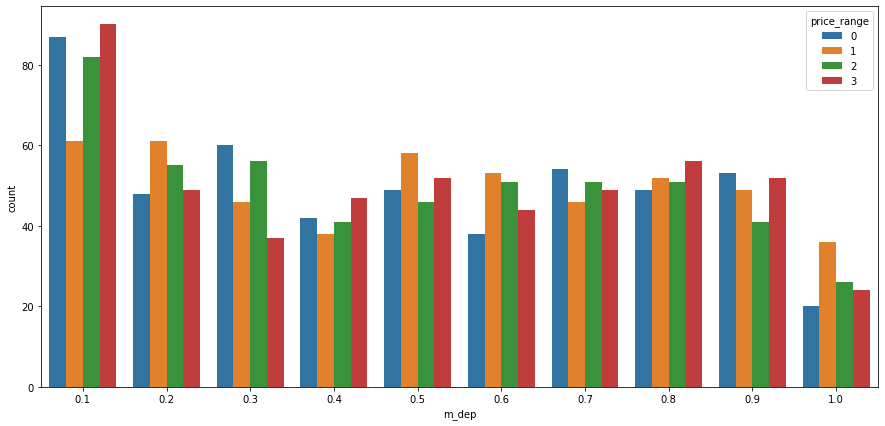

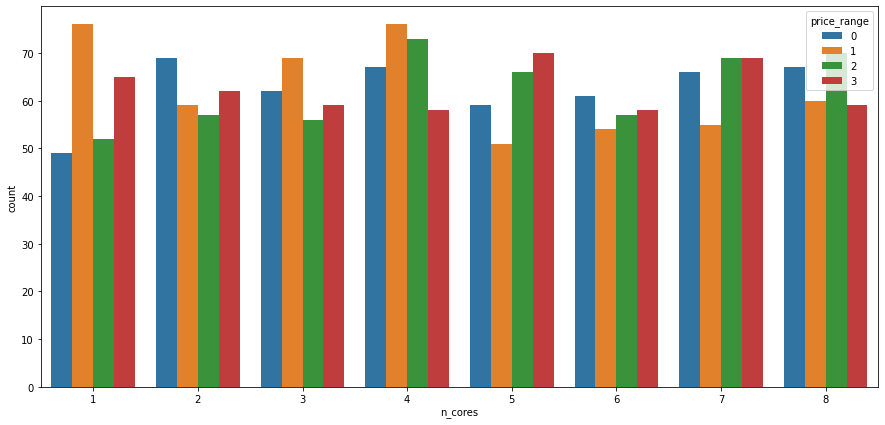

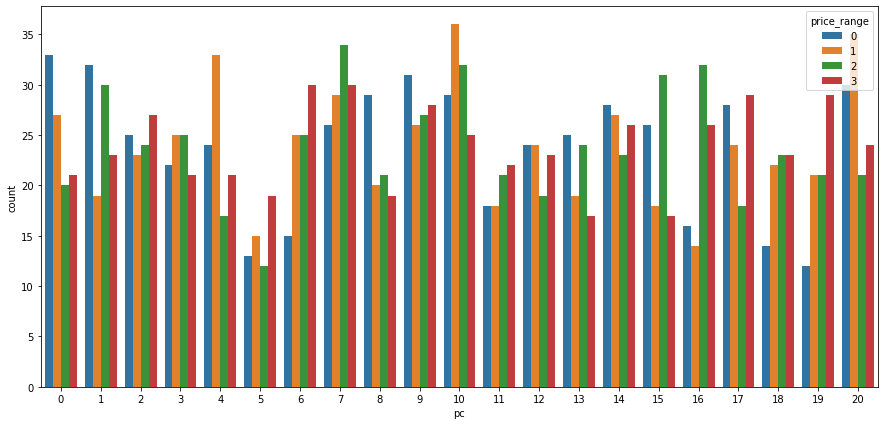

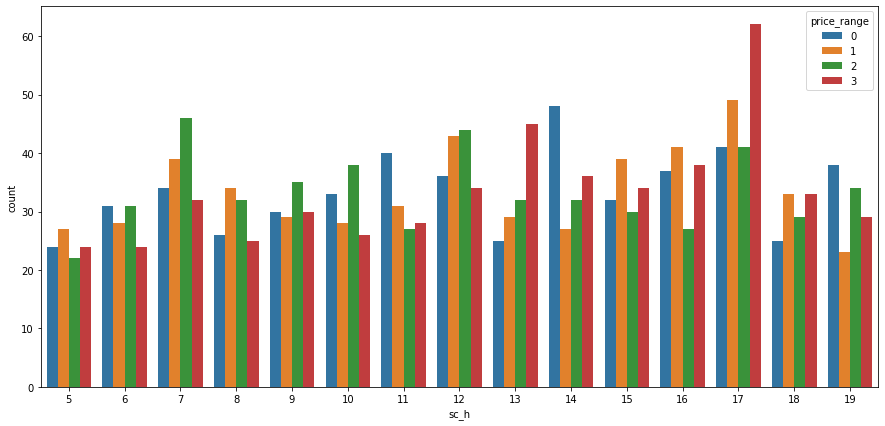

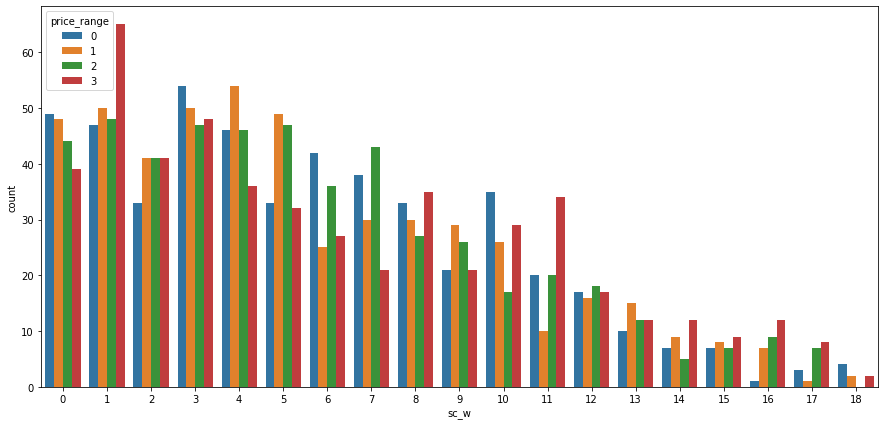

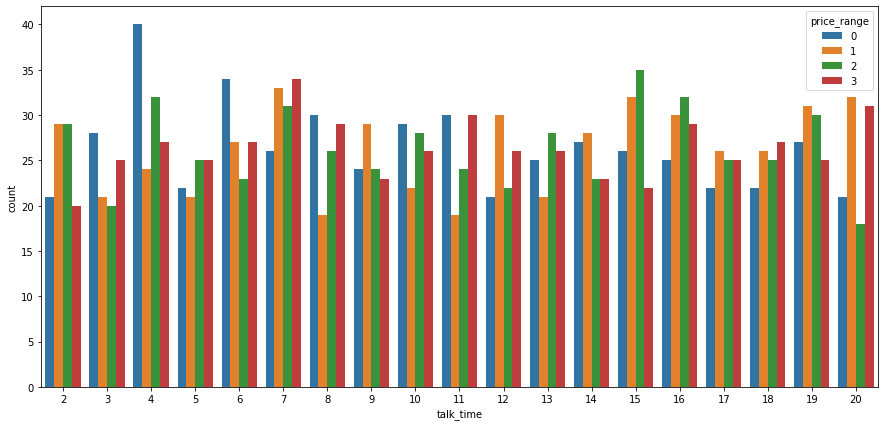

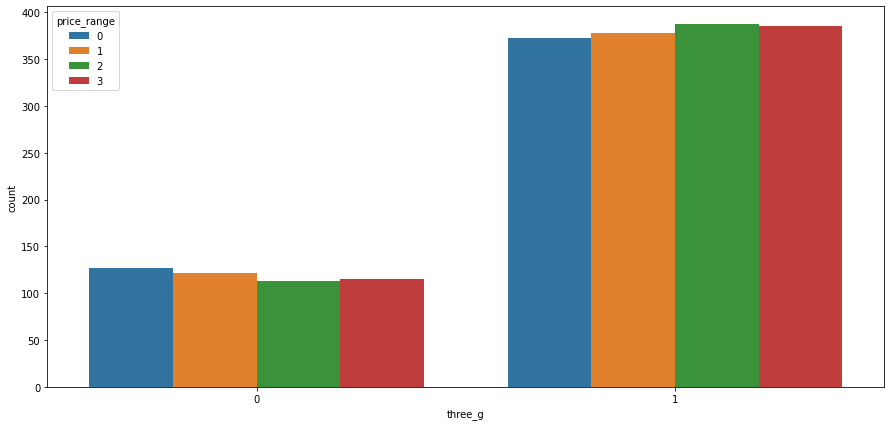

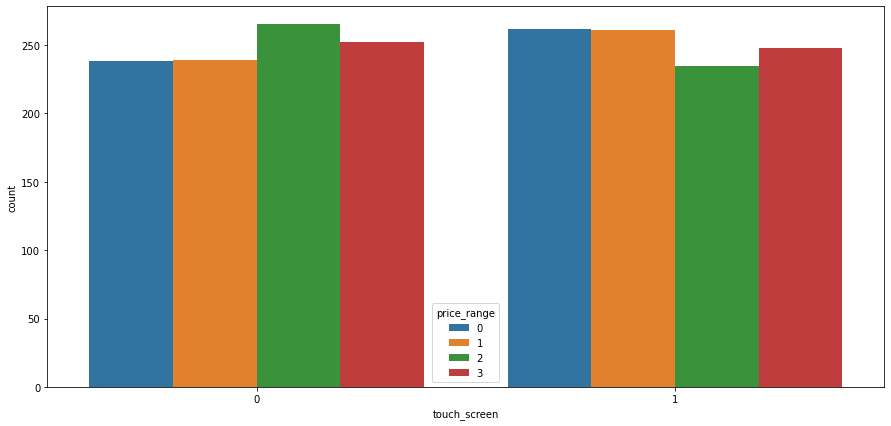

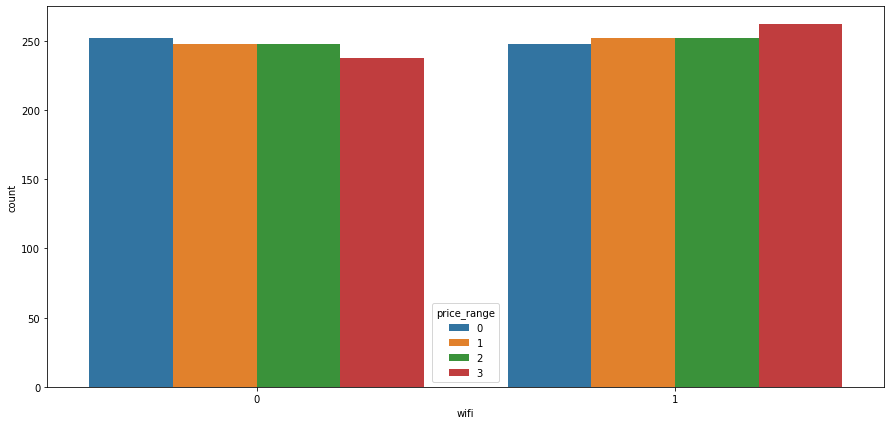

In [16]:
for feature in des_fea:
    plt.figure(figsize=(15,7))
    sns.countplot(data=df,x=feature,hue='price_range')
    plt.show()

#### Correlation values between descrete features

In [17]:
c=df[des_fea].corr()
c

,blue,clock_speed,dual_sim,fc,four_g,m_dep,n_cores,pc,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
blue,1.000000,0.021419,0.035198,0.003593,0.013443,0.004049,0.036161,-0.009952,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.021419,1.000000,-0.001315,-0.000434,-0.043073,-0.014364,-0.005724,-0.005245,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.022142,-0.024658,-0.017143,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.001791,-0.013356,0.644595,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
four_g,0.013443,-0.043073,0.003187,-0.016560,1.000000,-0.001823,-0.029706,-0.005598,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
m_dep,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,1.000000,-0.003504,0.026282,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
n_cores,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.003504,1.000000,-0.001193,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964
pc,-0.009952,-0.005245,-0.017143,0.644595,-0.005598,0.026282,-0.001193,1.000000,0.004938,-0.023819,0.014657,-0.001322,-0.008742,0.005389
sc_h,-0.002952,-0.029078,-0.011949,-0.011014,0.027166,-0.025348,-0.000315,0.004938,1.000000,0.506144,-0.017335,0.012033,-0.020023,0.025929
sc_w,0.000613,-0.007378,-0.016666,-0.012373,0.037005,-0.018388,0.025826,-0.023819,0.506144,1.000000,-0.022821,0.030941,0.012720,0.035423


<AxesSubplot:>

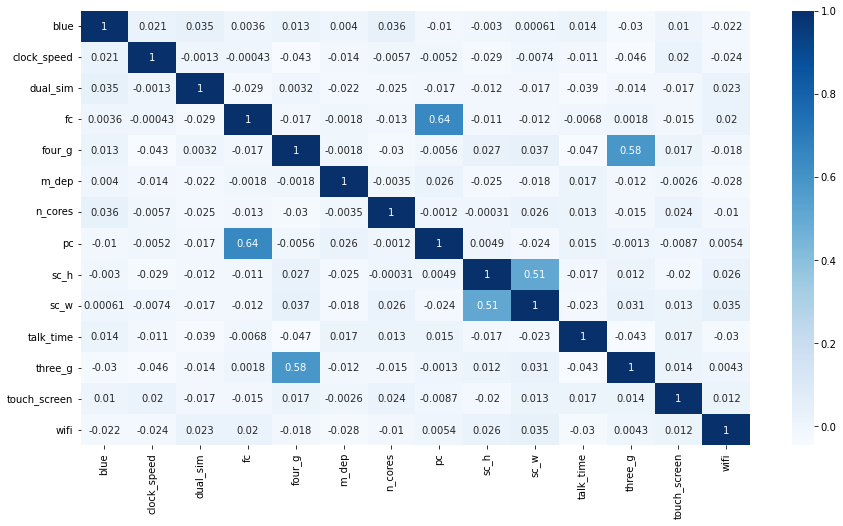

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(c,annot=True,cmap='Blues')  

#### Pairplot -To visualize the relationship between descrete features

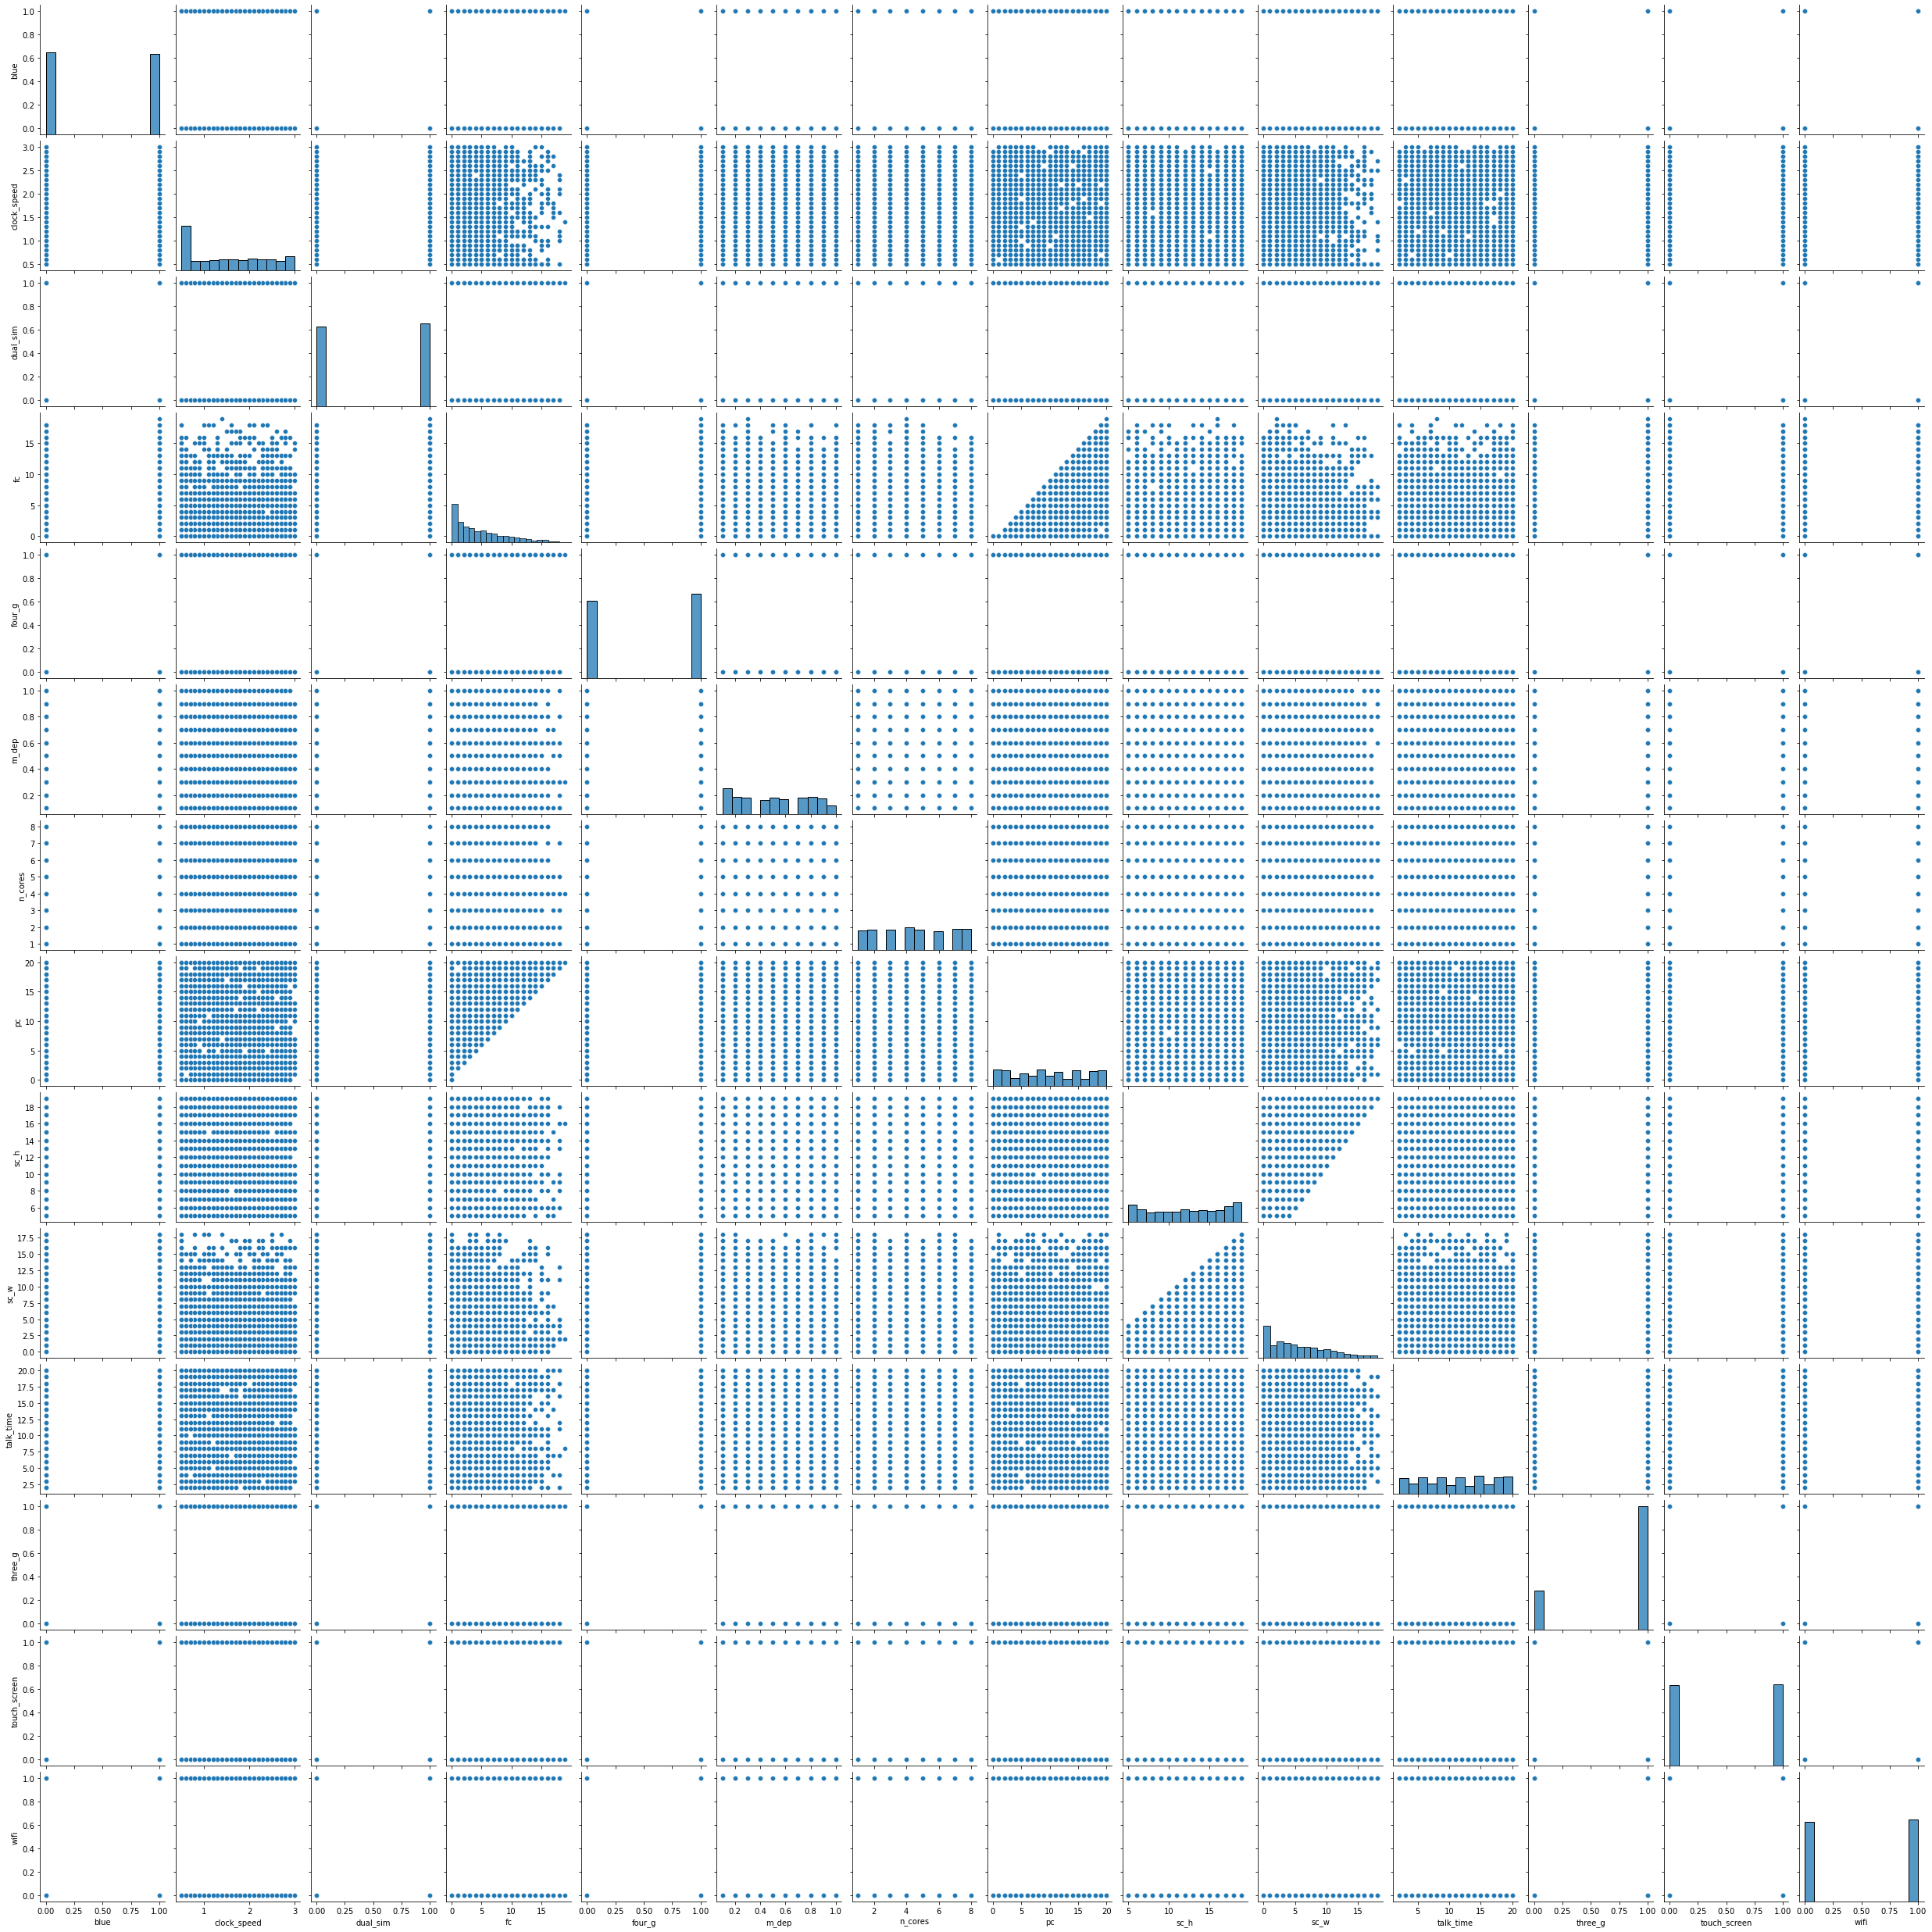

In [121]:
sns.pairplot(df[des_fea])

#### Checking for Outliers

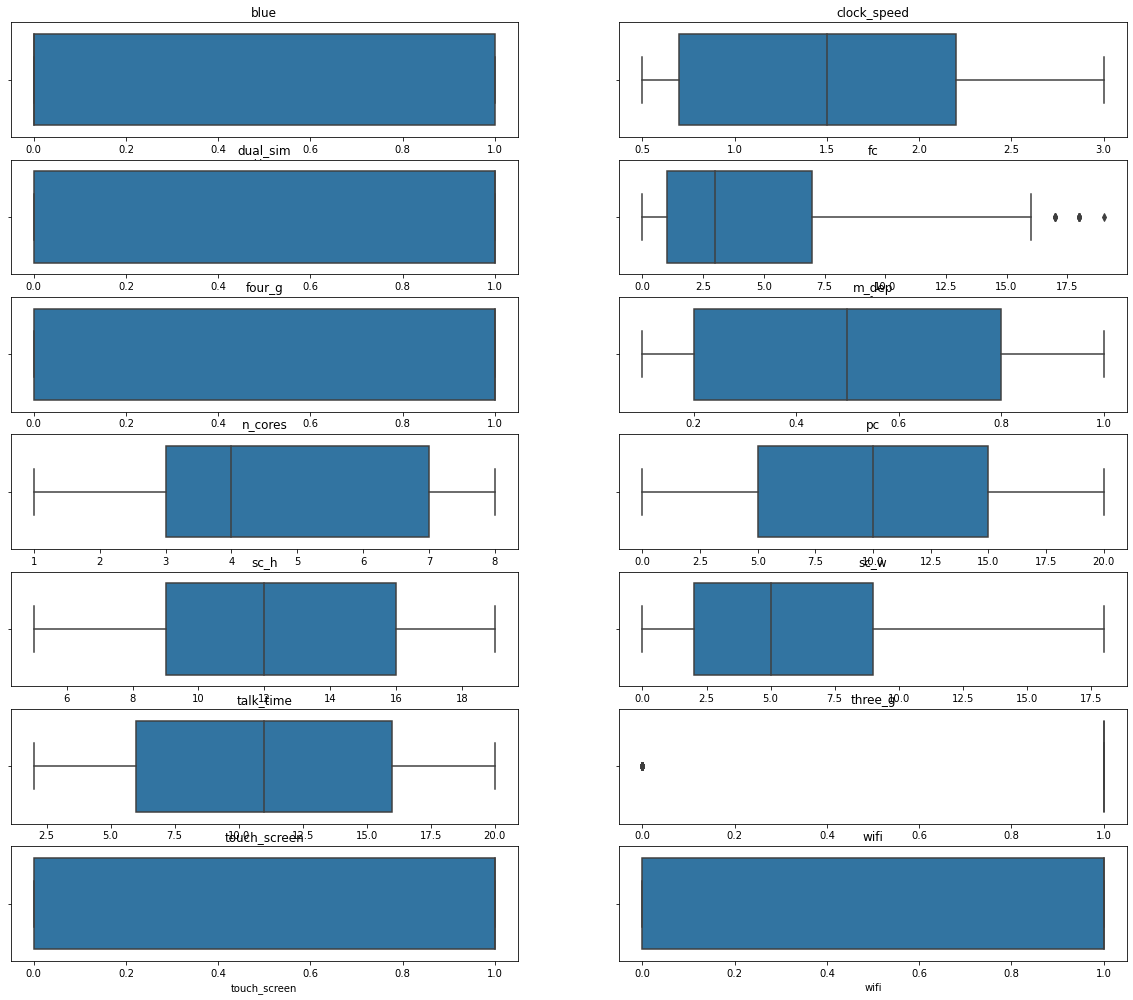

In [19]:
c=1
plt.figure(figsize=(20,40))
for feature in des_fea:
    plt.subplot(16,2,c)
    plt.title(feature)
    sns.boxplot(data=df,x=feature)
    c+=1

#### Univariate analysis of Numerical features

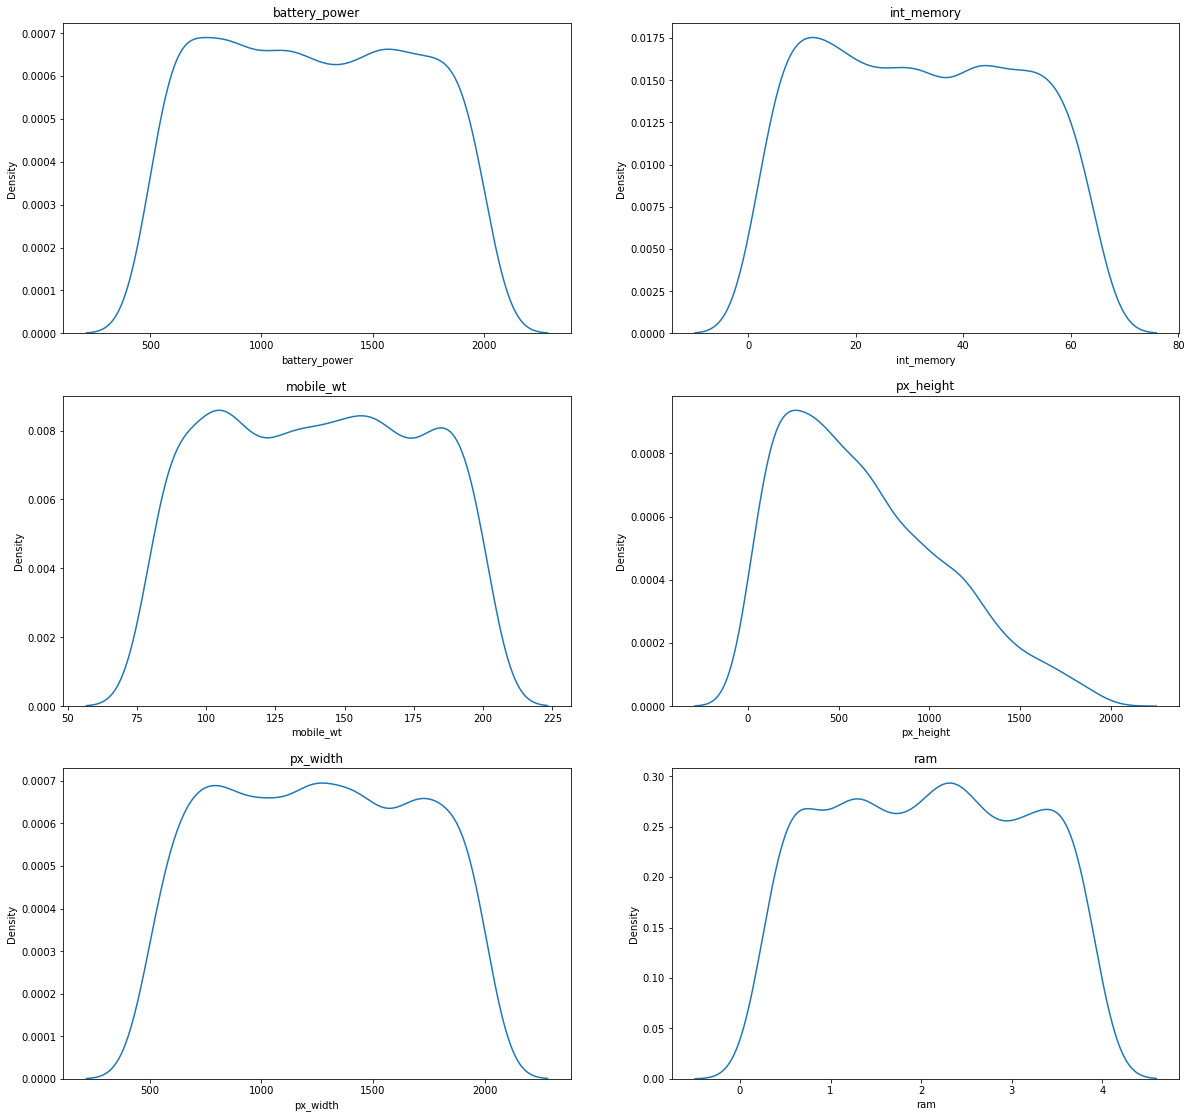

In [20]:
c=1
plt.figure(figsize=(20,40))
for feature in con_fea:
    plt.subplot(6,2,c)
    plt.title(feature)
    sns.kdeplot(data=df,x=feature)
    c+=1

#### Checking for Outliers 

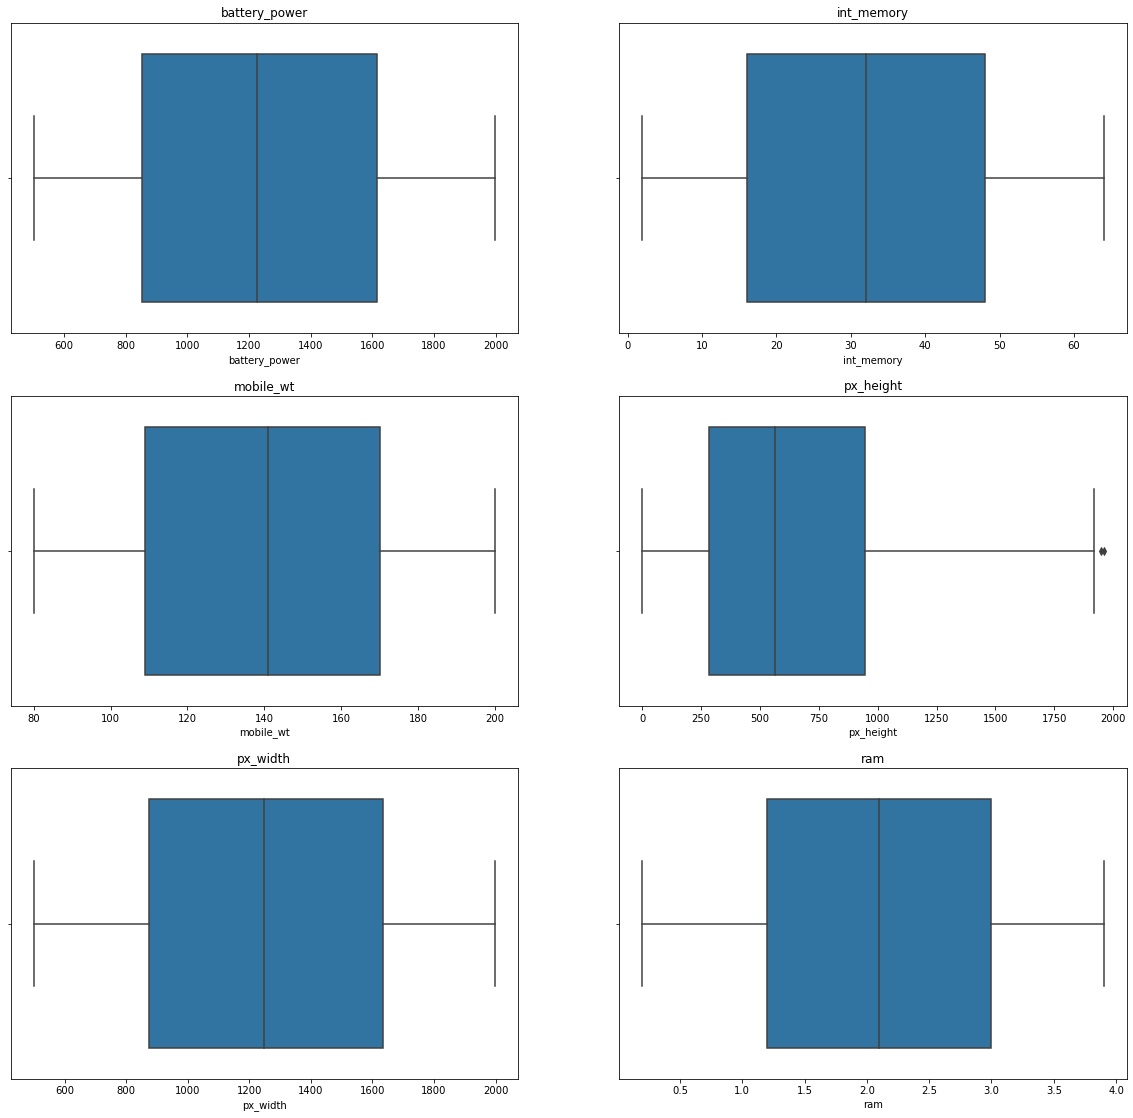

In [21]:
c=1
plt.figure(figsize=(20,40))
for feature in con_fea:
    plt.subplot(6,2,c)
    plt.title(feature)
    sns.boxplot(data=df,x=feature)
    c+=1

#### Prediction of Price Range using  KNN and NaiveBayes Classifier

In [22]:
x=df.iloc[:,:-1]
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2.5,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2.6,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2.5,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2.7,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1.4,8,2,15,1,1,0


In [23]:
y=df.iloc[:,-1]
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

#### Train Test Splitting of dataset

In [43]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1626,841,0,0.5,0,6,1,11,0.3,81,5,14,125,675,0.9,6,5,11,1,1,0
1666,1715,1,0.5,1,1,1,18,0.1,96,6,3,674,1375,2.5,17,2,3,1,0,0
1255,1039,0,0.6,0,5,1,6,0.1,136,6,8,62,544,3.1,15,7,7,1,0,1
92,885,0,2.3,1,0,1,15,0.4,103,7,0,769,802,1.4,16,10,5,1,1,1
280,1733,1,2.8,0,3,1,36,1.0,119,6,20,357,527,3.5,17,16,9,1,0,0


In [45]:
y_train.head()

1626    0
1666    3
1255    2
92      0
280     3
Name: price_range, dtype: int64

In [46]:
x_train.shape

(1600, 20)

In [47]:
x_test.shape

(400, 20)

#### Before Creating a ML model for prediction we need to Normalize data to same scale.

In [48]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [49]:
x_train

array([[-0.91836979, -1.00250313, -1.25576536, ...,  0.5600258 ,
         0.99501244, -1.02275892],
       [ 1.08665479,  0.99750312, -1.25576536, ...,  0.5600258 ,
        -1.00501256, -1.02275892],
       [-0.46414226, -1.00250313, -1.13224998, ...,  0.5600258 ,
        -1.00501256,  0.97774752],
       ...,
       [ 0.21031681, -1.00250313, -0.144127  , ...,  0.5600258 ,
         0.99501244, -1.02275892],
       [-0.7050205 , -1.00250313,  0.59696524, ..., -1.78563201,
        -1.00501256,  0.97774752],
       [-1.46665455, -1.00250313, -0.76170387, ..., -1.78563201,
         0.99501244, -1.02275892]])

In [50]:
x_test

array([[ 1.19677055, -1.00250313,  1.70860359, ...,  0.5600258 ,
         0.99501244,  0.97774752],
       [ 0.30666811, -1.00250313, -1.25576536, ...,  0.5600258 ,
         0.99501244,  0.97774752],
       [-0.39990806,  0.99750312,  1.09102673, ...,  0.5600258 ,
        -1.00501256, -1.02275892],
       ...,
       [-0.38843767,  0.99750312,  0.84399598, ..., -1.78563201,
         0.99501244, -1.02275892],
       [ 0.80448314, -1.00250313,  0.72048061, ...,  0.5600258 ,
        -1.00501256, -1.02275892],
       [-1.45977231, -1.00250313, -0.63818849, ...,  0.5600258 ,
        -1.00501256, -1.02275892]])

#### KNN Model Implementation`

In [115]:
knn_classifier=KNeighborsClassifier(n_neighbors=21)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [116]:
y_pred=knn_classifier.predict(x_test)
#y_predict


In [117]:
#### Evaluation of performace of the model using Accuracy_score

In [118]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
accuracy_score(y_test,y_pred)

0.6175

In [119]:
#Trying diff n_neighbor values
a=[]
for i in range(1,50):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(x_train,y_train)
    y_predict=knn_classifier.predict(x_test)
    a.append(accuracy_score(y_test,y_predict))
print(a)

[0.475, 0.4125, 0.45, 0.5075, 0.5025, 0.51, 0.51, 0.525, 0.5375, 0.5675, 0.5725, 0.5675, 0.57, 0.58, 0.5875, 0.575, 0.5675, 0.59, 0.5975, 0.605, 0.6175, 0.6025, 0.595, 0.595, 0.6075, 0.5925, 0.615, 0.6, 0.61, 0.62, 0.63, 0.615, 0.6175, 0.6025, 0.6125, 0.615, 0.6175, 0.62, 0.63, 0.6225, 0.625, 0.6475, 0.645, 0.65, 0.65, 0.6275, 0.6375, 0.65, 0.645]


#### Accuracy Score is low because we need to first perform feature selection and find those features that best describe the target_feature and exclude others

In [126]:
knn_c_r=classification_report(y_test,y_predict)
print(knn_c_r)

              precision    recall  f1-score   support

           0       0.73      0.87      0.80        95
           1       0.58      0.46      0.51       107
           2       0.49      0.62      0.55        96
           3       0.82      0.65      0.73       102

    accuracy                           0.65       400
   macro avg       0.66      0.65      0.65       400
weighted avg       0.66      0.65      0.64       400



In [37]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[117,  29,   7,   0],
       [ 46,  69,  45,   5],
       [  2,  39,  77,  23],
       [  0,   9,  53,  79]], dtype=int64)

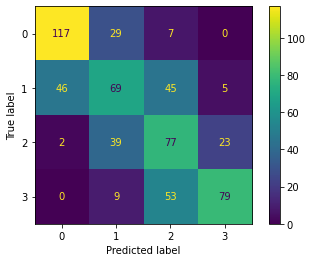

In [114]:
cmd=ConfusionMatrixDisplay(cm,display_labels=['0','1','2','3'])
cmd.plot();

#### Naive-bayes model Implementation

In [106]:
nb_classifier=GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [108]:
y_pred=nb_classifier.predict(x_test)
y_pred

array([1, 1, 0, 2, 3, 2, 3, 1, 2, 2, 2, 0, 3, 2, 0, 2, 3, 3, 1, 2, 2, 1,
       1, 0, 2, 3, 1, 2, 2, 2, 3, 0, 0, 0, 2, 2, 2, 1, 1, 2, 3, 2, 2, 1,
       1, 1, 1, 1, 0, 3, 1, 1, 3, 1, 1, 3, 0, 3, 1, 0, 2, 3, 1, 2, 3, 0,
       2, 0, 0, 2, 3, 2, 3, 3, 0, 0, 3, 2, 3, 1, 1, 3, 2, 1, 0, 1, 1, 3,
       1, 1, 0, 3, 0, 2, 0, 1, 3, 3, 2, 3, 2, 3, 3, 2, 0, 0, 2, 0, 3, 3,
       0, 1, 1, 2, 3, 1, 0, 0, 0, 3, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0,
       3, 1, 3, 2, 0, 3, 0, 1, 0, 1, 3, 3, 3, 2, 3, 0, 1, 0, 3, 3, 2, 1,
       0, 3, 3, 0, 2, 0, 3, 3, 0, 1, 2, 3, 2, 1, 2, 2, 2, 1, 3, 2, 3, 1,
       1, 1, 0, 1, 0, 3, 0, 3, 2, 0, 2, 1, 1, 3, 0, 2, 3, 3, 3, 3, 2, 3,
       0, 1, 0, 1, 0, 1, 3, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 0, 1, 3,
       2, 3, 3, 3, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 3, 0, 2, 3, 0, 2, 0, 0,
       1, 1, 3, 3, 3, 2, 2, 0, 1, 2, 2, 2, 3, 2, 1, 1, 0, 1, 1, 2, 2, 2,
       0, 3, 3, 3, 1, 0, 0, 1, 3, 3, 1, 0, 1, 0, 3, 0, 1, 1, 2, 3, 3, 3,
       0, 0, 3, 1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 2, 1,

In [109]:
nb_score=accuracy_score(y_test,y_pred)
nb_score

0.8125

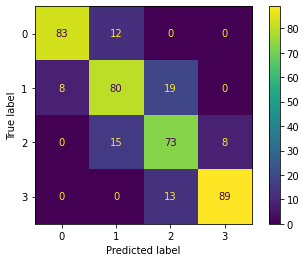

In [113]:
cmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=[0,1,2,3])
cmd.plot();

In [125]:
nb_c_r=classification_report(y_test,y_pred)
print(nb_c_r)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        95
           1       0.52      0.47      0.49       107
           2       0.49      0.59      0.54        96
           3       0.81      0.67      0.73       102

    accuracy                           0.62       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.63      0.62      0.62       400

